# Análisis de los datos

In [1]:
# importar librerias necesarias
import pandas as pd # para manejar dataframes
# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_theme(style="darkgrid")

In [2]:
# dataframe con toda la informacion recompilada de RawData
df_data = pd.read_csv('../csvFiles/raw_pacientes.csv', dtype=object) # salida de leer_dataset.ipynb
df_data.head() # visualizacion de la cabecera

,SubjectID,GestureLabel,RepetitionNumber,CorrectLabel,Position,JointName,3D_X,3D_Y,3D_Z
0,101,0,1,1,stand,SpineBase,-0.1028086,0.06965441,2.464606
1,101,0,1,1,stand,SpineMid,-0.1026228,0.3837799,2.438919
2,101,0,1,1,stand,Neck,-0.1025293,0.6877351,2.40196
3,101,0,1,1,stand,Head,-0.1190992,0.8358598,2.373549
4,101,0,1,1,stand,ShoulderLeft,-0.2826451,0.5525576,2.38421


In [3]:
# dataframe de los ángulos
# dataframe con toda la informacion  de RawData
df_angle = pd.read_csv('../csvFiles/angles.csv', dtype=object) # salida de leer_dataset.ipynb
df_angle.head() # visualizacion de la cabecera

,SubjectID,GestureLabel,RepetitionNumber,CorrectLabel,Position,ElbowAngleLeft,ElbowAngleRight,ShoulderAngleLeft,ShoulderAngleRight,WristAngleLeft,WristAngleRight,HipAngleLeft,KneeAngleLeft,AnkleAngleLeft,HipAngleRight,KneeAngleRight,AnkleAngleRight,LeftArmAngle,RightArmAngle,ArmsTogetherAngle
0,101,0,1,1,stand,18.731843936650424,12.815118946951435,142.56072708652192,140.8571426387537,2.598763677332713,6.344405637608901,104.5747679730094,3.7435506773061333,64.24626053705715,101.52185041599935,4.855627354351335,60.940986210135996,156.79111229969607,159.877407693405,152.5802699744159
1,101,0,1,1,stand,18.682010755659054,13.214648067770003,142.7577595466217,140.9677208312887,2.5228468664442496,5.905770832550968,104.49919472393678,3.8218023488309028,64.33472935259476,101.59042532461358,4.885455773565752,61.134581500479065,156.6678130863767,160.03520258395608,152.60252680100132
2,101,0,1,1,stand,18.530184262036656,14.175895064520457,142.7247948799034,140.88609375865042,3.2399812822540492,6.639702926066894,104.55811872843174,3.8325701798137515,64.07890086662397,101.49209376606214,4.776420751381912,59.97208176790675,156.7471314836981,160.25176387076863,152.59651349643386
3,101,0,1,1,stand,18.525440977960322,15.675640279915678,142.79622290883253,140.9968189243439,3.4884771024653816,10.172813641210128,104.50249858755312,3.642045853947008,63.451165579610276,101.4229465647835,4.655746650709144,59.36623122144632,156.7156146991269,160.58950237088143,152.65336196960283
4,101,0,1,1,stand,18.440643919913423,18.67249056716455,142.75501899334424,140.9860298960347,3.640028366721418,9.700974734790202,104.55404594109505,3.6707316236153287,63.21274018000994,101.31100108996237,4.601471721779157,59.328042932406,156.7934840564589,160.6683059545748,152.67563978301823


## 1. Posición a través de t

Posición de la muñeca de una persona sana (102) vs un paciente (id: 206) realizando una flexión de hombro

In [32]:
def repetition_graph(df:pd.DataFrame, keyPoint:str, movementAxis:str):
    """
    Crea una gráfica donde se representa la posición de un keypoint frente al tiempo (frame).
    Cada línea representa una repetición distinta.
    """
    groups = df.groupby("RepetitionNumber") # agrupa el dataframe según la repeticion
 
    for _ , group in groups:
        spinBase = group[group['JointName']=='SpineBase'][movementAxis] # cogemos tambien la posicion de la base de la columna para poder normalizar los datos
        WristRight = group[group['JointName']==keyPoint][movementAxis]
        normalize_values = WristRight.values - spinBase.values
        plt.plot(normalize_values)
        plt.ylabel("y-axis position")
        plt.xlabel("Frame number")
        plt.ylim((0, 0.9))


In [33]:
def extraer_persona(df:pd.DataFrame, id:str, id_gesture:list[str]) -> pd.DataFrame:
    """
    Crea un dataframe la posición de los keypoints referente a un moviento de una persona
    """
    conditions = (df['SubjectID'] == id) & (df['GestureLabel'].isin(id_gesture) )  & (df['Position'] =='stand')
    persona = df[conditions]
    persona = persona.apply(lambda x: pd.to_numeric(x, errors = 'ignore'))
    return persona

In [34]:
# seleccionamos a las dos personas
persona_sana = extraer_persona(df_data, '102', ['6'])
paciente_206 = extraer_persona(df_data, '206', ['6'])

C:\Users\nerea\AppData\Local\Temp\ipykernel_24268\1655749113.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  persona = persona.apply(lambda x: pd.to_numeric(x, errors = 'ignore'))


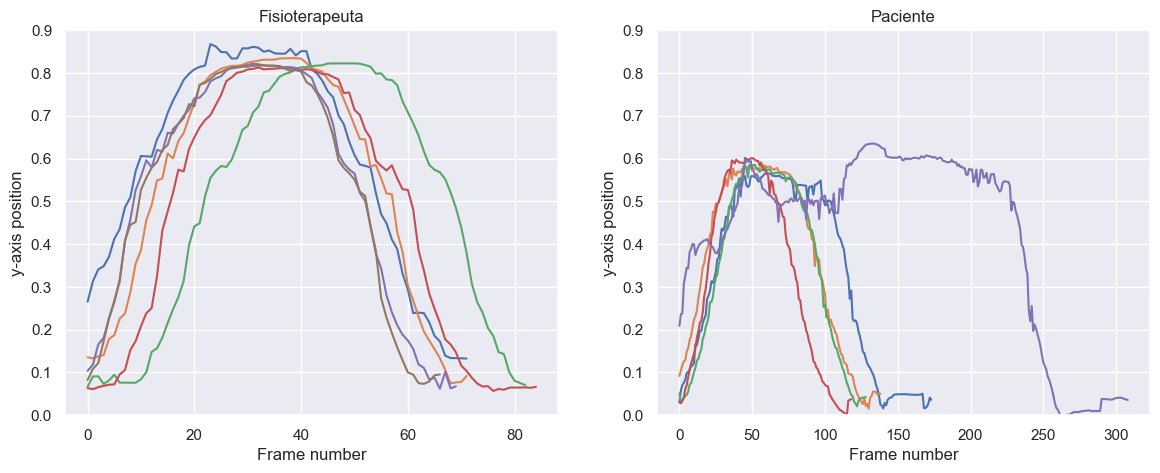

In [35]:
# creamos una gráfica para cada persona
fig = plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.title('Fisioterapeuta')
repetition_graph(persona_sana, 'WristRight', '3D_Y')

plt.subplot(1, 2, 2)
plt.title('Paciente')
repetition_graph(paciente_206, 'WristRight', '3D_Y')

plt.show()

## 2. Numero de correctas e incorrectas (class imbalance)

* CorrectLabel: A value of 1 represents a gesture labeled as being correctly executed, while a value of 2 is for a gesture labeled as incorrect

QUE HACER CON CorrectLabel = 3

Text(0, 0.5, 'Number of Patients')

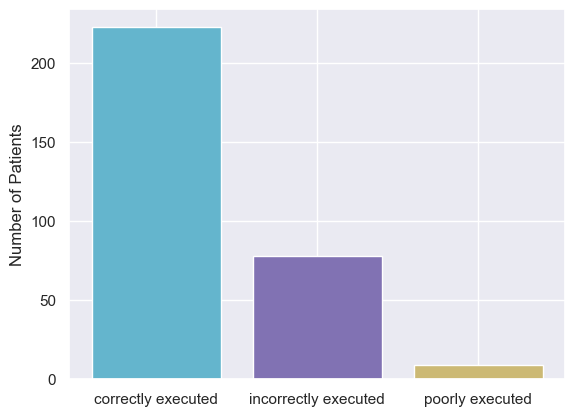

In [8]:
df_peque = df_data[['SubjectID', 'GestureLabel', 'CorrectLabel']].drop_duplicates().reset_index(drop=True)

df_peque = df_peque.groupby(['CorrectLabel']).count()

x = ["correctly executed", "incorrectly executed", "poorly executed"]
color =  ['c', 'm', 'y']
plt.bar(x, df_peque['GestureLabel'].values, color=color)
plt.ylabel('Number of Patients')

C:\Users\nerea\AppData\Local\Temp\ipykernel_24268\2557285387.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="GestureLabel", y="SubjectID", data=subject_per_gesture, palette="viridis")
C:\Users\nerea\AppData\Local\Temp\ipykernel_24268\2557285387.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(gesture_labels)


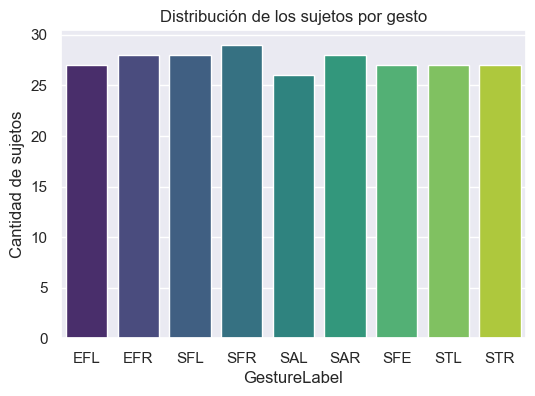

In [25]:
subject_per_gesture = df_data.groupby("GestureLabel")["SubjectID"].nunique().reset_index()

plt.figure(figsize=(6,4))
ax = sns.barplot(x="GestureLabel", y="SubjectID", data=subject_per_gesture, palette="viridis")
# Set the x-axis ticks to the desired labels

# Set the x-axis ticks to the desired labels
gesture_labels = ['EFL', 'EFR', 'SFL', 'SFR', 'SAL', 'SAR', 'SFE', 'STL', 'STR']
ax.set_xticklabels(gesture_labels)

ax.set_title("Distribución de los sujetos por gesto")
ax.set_xlabel("GestureLabel")
ax.set_ylabel("Cantidad de sujetos")
plt.show()

C:\Users\nerea\AppData\Local\Temp\ipykernel_24268\1284114020.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(gesture_labels)


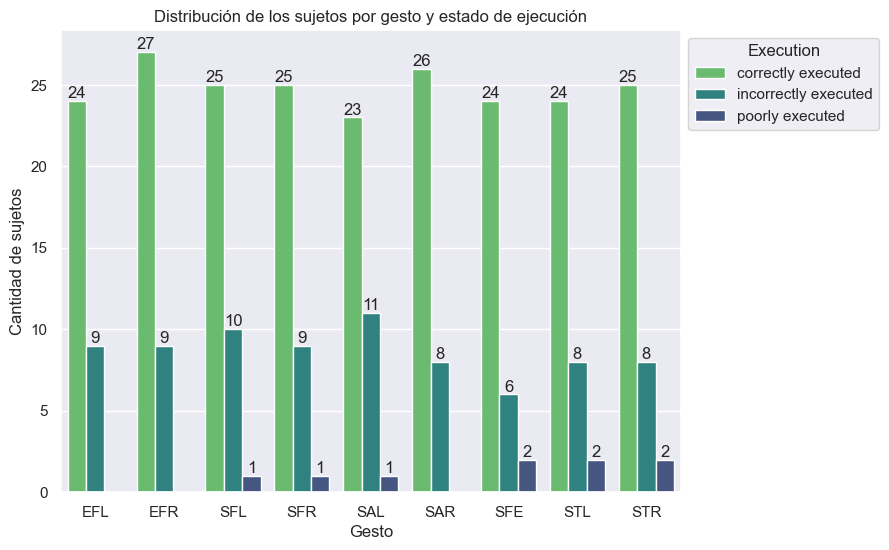

In [24]:
subject_count_per_gesture_correct = df_data.groupby(["GestureLabel", "CorrectLabel"])["SubjectID"].nunique().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="GestureLabel", y="SubjectID", hue="CorrectLabel",
                 data=subject_count_per_gesture_correct, palette="viridis_r")

ax.set_title("Distribución de los sujetos por gesto y estado de ejecución")
ax.set_xlabel("Gesto")
ax.set_ylabel("Cantidad de sujetos")

# Set the x-axis ticks to the desired labels
gesture_labels = ['EFL', 'EFR', 'SFL', 'SFR', 'SAL', 'SAR', 'SFE', 'STL', 'STR']
ax.set_xticklabels(gesture_labels)

# Modify the legend labels
legend_labels = ['correctly executed', 'incorrectly executed', 'poorly executed']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=legend_labels, title='Execution')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

## 3. Ángulos a través de t

In [11]:
persona104_right = extraer_persona(df_angle, '104', ['1', '3', '5', '6'])

C:\Users\nerea\AppData\Local\Temp\ipykernel_24268\1655749113.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  persona = persona.apply(lambda x: pd.to_numeric(x, errors = 'ignore'))


In [12]:
def angle_graph(df:pd.DataFrame, angle:str):
    groups = df.groupby(["GestureLabel"]) # agrupa el dataframe el movimineto
    n_angles = groups.ngroups
    fig, axes = plt.subplots(n_angles, 1, figsize=(10, 3*n_angles))  # Adjust figsize as needed
    axs = axes.flatten()  # Flatten the list of subplots

    for i, (name, group) in enumerate(groups):

        group = group.reset_index(drop=True) 
        #valueAngle = group[angle]
        sns.lineplot(data=group, x=group.index, y=angle, hue='RepetitionNumber',
                     ax=axs[i], palette='flare', legend=False)

        axs[i].set_xlabel("Frame number")
        axs[i].set_ylabel("Angle")
        axs[i].set_title('Gesture id: ' + str(name[0]))

    plt.tight_layout()  # Adjust the layout to prevent overlapping
    plt.show()  # Display the plot

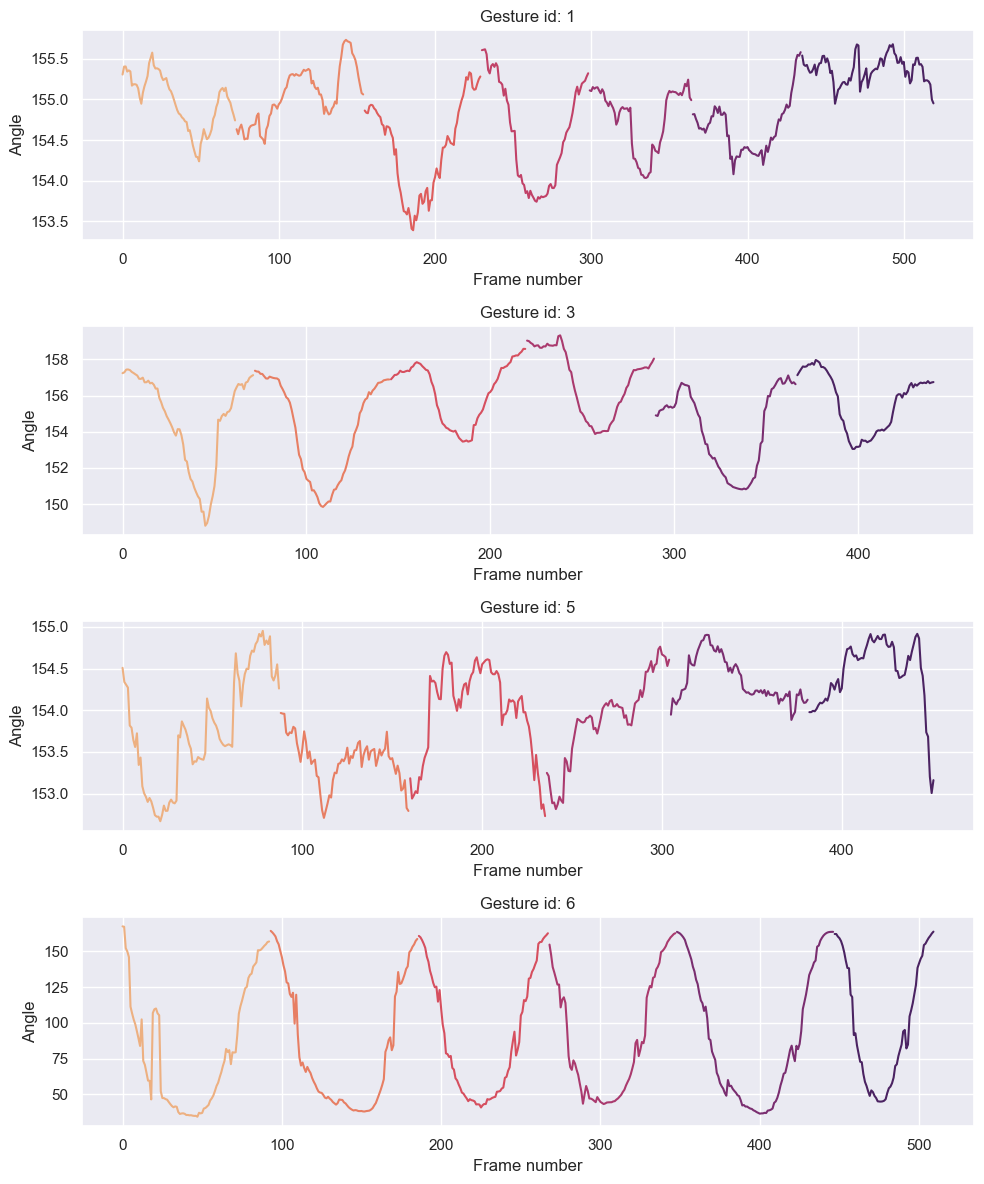

In [13]:
angle_graph(persona104_right, 'RightArmAngle')